In [3]:
import pandas as pd
import numpy as np
from  datetime import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_rows',100)
pd.set_option('display.min_rows',100)
pd.set_option('display.max_columns',150)

In [5]:
data = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory=False)

In [5]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [63]:
grade = data.groupby('grade')

In [64]:
grade.agg(['count','mean','median','std'])['int_rate']

,count,mean,median,std
grade,,,,
A,433027,7.084545,7.24,0.984465
B,663557,10.675806,10.75,1.238302
C,650053,14.143689,13.99,1.251283
D,324424,18.143067,17.99,1.676964
E,135639,21.829653,21.48,2.703925
F,41800,25.454091,24.89,2.928144
G,12168,28.074255,28.18,2.804587


In [108]:
grade.agg(['count','mean','median','std','sum'])['loan_amnt']

,count,mean,median,std,sum
grade,,,,,
A,433027,14603.343210,12000.0,9107.975657,6.323642e+09
B,663557,14173.338199,12000.0,8957.012601,9.404818e+09
C,650053,15038.083318,13000.0,9203.950054,9.775551e+09
D,324424,15711.983007,14400.0,9250.612823,5.097344e+09
E,135639,17453.078392,16000.0,9363.276694,2.367318e+09
F,41800,19124.646531,18175.0,9166.366254,7.994102e+08
G,12168,20383.988741,19800.0,8994.472986,2.480324e+08


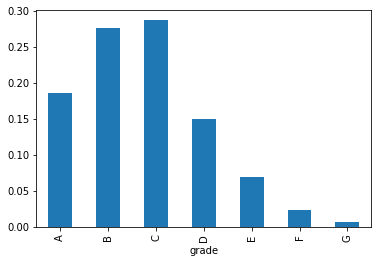

In [107]:
# loan issued amount breakout by grade
grade['loan_amnt'].sum().apply(lambda x: x/sum(data['loan_amnt'])).plot.bar()

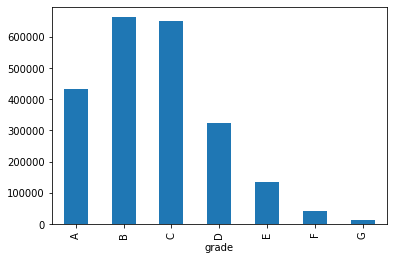

In [114]:
# loan issued count breakout by grade
grade['loan_amnt'].count().apply(lambda x: x/#number of rows).plot.bar()

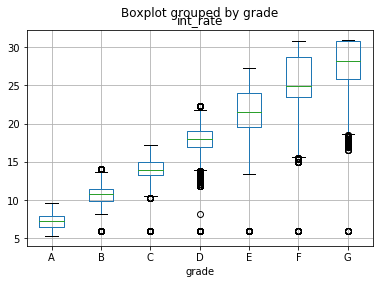

In [112]:
# interest rate and grade boxplot
data[['grade','int_rate']].boxplot(by='grade',column='int_rate')

In [138]:
# 33 rows seem to have missing values across the board- removing those for EDA
data.isna().sum()

id                                                  0
member_id                                     2260668
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                      166969
emp_length                                     146907
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

In [6]:
# dropping rows with chronic na issues
data = data.dropna(axis = 0, how = 'all', subset = ['issue_d'])

In [7]:
#convert date issued to date format
data['issue_d'] = data['issue_d'].apply(lambda x: dt.strptime(x,'%b-%Y').date())

In [8]:
#convert column from object to date
data['issue_d'] = pd.to_datetime(data['issue_d'])

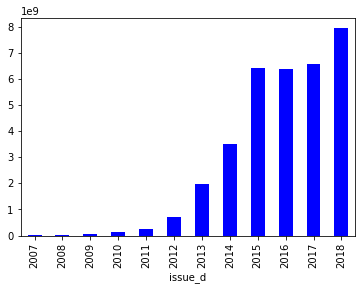

In [88]:
#loan issue amount by year
data.groupby(data.issue_d.dt.year).agg('sum')['loan_amnt'].plot.bar(color = 'b')

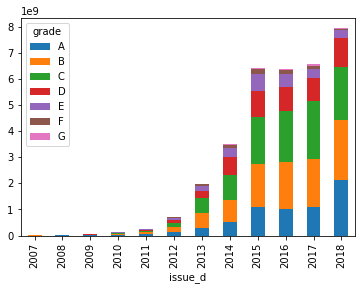

In [100]:
# sum of loan amounts issued by grade by year
data.groupby([data.issue_d.dt.year,'grade'])['loan_amnt'].sum().unstack('grade').plot(kind='bar',stacked = True)

In [15]:
# loan outcomes by percent/grade
status_group = data.loc[data.loan_status!='Current',:].groupby(['grade','loan_status'])['loan_status'].count()
status_group.groupby(level = 0).apply(lambda x: x/float(x.sum()))

grade  loan_status                                        
A      Charged Off                                            0.059797
       Default                                                0.000021
       Does not meet the credit policy. Status:Charged Off    0.000034
       Does not meet the credit policy. Status:Fully Paid     0.000379
       Fully Paid                                             0.930106
       In Grace Period                                        0.002661
       Late (16-30 days)                                      0.001436
       Late (31-120 days)                                     0.005567
B      Charged Off                                            0.131208
       Default                                                0.000017
       Does not meet the credit policy. Status:Charged Off    0.000212
       Does not meet the credit policy. Status:Fully Paid     0.000671
       Fully Paid                                             0.849042
       In Grace Pe

In [16]:

type(status_group.groupby(level = 0).apply(lambda x: x/float(x.sum())))

pandas.core.series.Series

In [9]:
# create ROI percent column
data['roi_dollar'] = data['total_pymnt'] - data['loan_amnt']
data['roi_percent'] = data['roi_dollar']/data['loan_amnt']
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,roi_dollar,roi_percent
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,...,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,821.723917,0.228257
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,...,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,Na

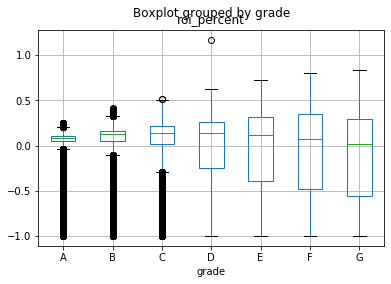

In [13]:
# ROI by class boxplot
data.loc[data.loan_status!='Current',:][['grade','roi_percent']].boxplot(by='grade',column='roi_percent')

In [136]:
# add unemployment datatable
unemployment = pd.read_csv('unemployment.csv')

In [137]:
unemployment

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2000,4.0,4.1,4.0,3.8,4.0,4.0,4.0,4.1,3.9,3.9,3.9,3.9
1,2001,4.2,4.2,4.3,4.4,4.3,4.5,4.6,4.9,5.0,5.3,5.5,5.7
2,2002,5.7,5.7,5.7,5.9,5.8,5.8,5.8,5.7,5.7,5.7,5.9,6.0
3,2003,5.8,5.9,5.9,6.0,6.1,6.3,6.2,6.1,6.1,6.0,5.8,5.7
4,2004,5.7,5.6,5.8,5.6,5.6,5.6,5.5,5.4,5.4,5.5,5.4,5.4
5,2005,5.3,5.4,5.2,5.2,5.1,5.0,5.0,4.9,5.0,5.0,5.0,4.9
6,2006,4.7,4.8,4.7,4.7,4.6,4.6,4.7,4.7,4.5,4.4,4.5,4.4
7,2007,4.6,4.5,4.4,4.5,4.4,4.6,4.7,4.6,4.7,4.7,4.7,5.0
8,2008,5.0,4.9,5.1,5.0,5.4,5.6,5.8,6.1,6.1,6.5,6.8,7.3
9,2009,7.8,8.3,8.7,9.0,9.4,9.5,9.5,9.6,9.8,10.0,9.9,9.9


In [11]:
# change format to month date columns, change name of month column to month
unemployment = pd.melt(unemployment, id_vars = ['Year'],value_name = 'unemployment_rate')
unemployment = unemployment.rename(columns = {'variable':'Month'})
unemployment['Year'] = unemployment['Year'].astype(str)
unemployment['date'] = unemployment['Month'].str.cat(unemployment['Year'],sep = '-')
unemployment['date'] = unemployment['date'].apply(lambda x: dt.strptime(x,'%b-%Y').date())
unemployment['date'] = pd.to_datetime(unemployment['date'])
unemployment

,Year,Month,unemployment_rate,date
0,2000,Jan,4.0,2000-01-01
1,2001,Jan,4.2,2001-01-01
2,2002,Jan,5.7,2002-01-01
3,2003,Jan,5.8,2003-01-01
4,2004,Jan,5.7,2004-01-01
5,2005,Jan,5.3,2005-01-01
6,2006,Jan,4.7,2006-01-01
7,2007,Jan,4.6,2007-01-01
8,2008,Jan,5.0,2008-01-01
9,2009,Jan,7.8,2009-01-01


In [12]:
# add unemployment rate to main dataframe
data['date'] = data['issue_d']
data = pd.merge(data,unemployment[['date','unemployment_rate','Year']], on = 'date', how = 'inner')

In [13]:
# adding unemployemnt at beginning of loan issue, middle and end
data['unemployment_rate_start'] = data['unemployment_rate']


In [65]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,roi_dollar,roi_percent,date,unemployment_rate
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,...,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,821.723917,0.228257,2015-12-01,5.0
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,...,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

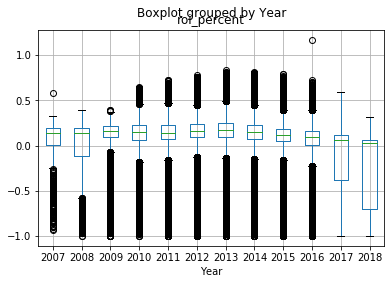

In [69]:
#roi by year all grades
data.loc[data.loan_status!='Current',:][['Year','roi_percent']].boxplot(by='Year',column='roi_percent')

In [23]:
# create dataframe for completed junk loans
subprime = data.loc[data['grade'].isin(['D','E','F','G'])]
subprime = subprime.loc[subprime['loan_status'].isin(['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','Does not meet the credit policy. Status:Fully Paid','Fully Paid'])]

In [24]:
subprime.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,roi_dollar,roi_percent,date,unemployment_rate,Year,unemployment_rate_start
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.50,11740.50,10400.00,1340.50,0.0,0.0,0.000,Jul-2016,10128.96,NaN,Mar-2018,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,...,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1340.50,0.128894,2015-12-01,5.0,2015,5.0
13,66624733,NaN,18000.0,18000.0,18000.0,60 months,19.48,471.70,E,E2,Software Manager,7 years,RENT,150000.0,Not Verified,2015-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,916xx,CA,9.39,0.0,Jun-2005,665.0,669.0,1.0,NaN,75.0,18.0,1.0,14052.0,40.7,27.0,w,0.0,0.0,9452.74,9452.74,3481.86,4351.98,0.0,1618.9,291.402,May-2017,471.70,NaN,Nov-2017,584.0,580.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,60.0,36247.0,2.0,2.0,1.0,3.0,2.0,22195.0,71.0,2.0,4.0,1271.0,55.0,34500.0,...,0.0,0.0,115.0,112.0,1.0,1.0,2.0,9.0,NaN,2.0,NaN,0.0,6.0,13.0,7.0,8.0,6.0,16.0,19.0,13.0,18.0,0.0,0.0,0.0,3.0,100.0,14.3,1.0,0.0,65819.0,36247.0,10300.0,31319.0,NaN,NaN,NaN,

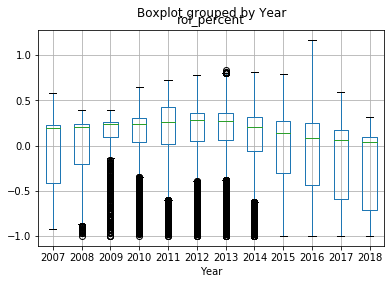

In [25]:
# roi by year for subprime mortages

subprime[['Year','roi_percent']].boxplot(by='Year',column='roi_percent')

In [26]:
subprime.loc[subprime['Year']=='2018',:].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,roi_dollar,roi_percent,date,unemployment_rate,Year,unemployment_rate_start
421133,130966492,NaN,30000.0,30000.0,30000.0,36 months,21.85,1143.39,D,D5,teacher,10+ years,OWN,57000.0,Verified,2018-03-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,341xx,FL,27.58,0.0,Apr-2000,680.0,684.0,1.0,68.0,NaN,11.0,0.0,29222.0,53.2,26.0,w,0.0,0.0,34389.550341,34389.55,30000.00,4389.55,0.0,0.00,0.0000,Dec-2018,26458.65,NaN,Dec-2018,699.0,695.0,0.0,68.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,157566.0,1.0,1.0,2.0,2.0,6.0,33030.0,94.0,2.0,2.0,6236.0,69.0,55500.0,...,0.0,0.0,195.0,215.0,11.0,6.0,2.0,11.0,NaN,0.0,NaN,1.0,3.0,4.0,6.0,7.0,10.0,9.0,14.0,4.0,11.0,0.0,0.0,0.0,5.0,96.0,33.3,0.0,0.0,188780.0,62252.0,29400.0,35000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,4389.550341,0.146318,2018-03-01,4.0,2018,4.0
421135,130942737,NaN,21000.0,21000.0,21000.0,60 months,20.39,560.94,D,D4,Machine operator,10+ years,OWN,85000.0,Source Verified,2018-03-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,house,Home buying,135xx,NY,15.76,1.0,Nov-2008,665.0,669.0,0.0,2.0,NaN,15.0,0.0,14591.0,34.2,27.0,w,0.0,0.0,24217.170915,24217.17,21000.00,3217.17,0.0,0.00,0.0000,Feb-2019,183.26,NaN,Mar-2019,659.0,655.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,128270.0,1.0,1.0,2.0,2.0,7.0,37076.0,NaN,2.0,5.0,5354.0,34.0,42700.0,...,0.0,0.0,67.0,112.0,4.0,4.0,3.0,4.0,NaN,0.0,2.0,0.0,5.0,7.0,6.0,10.0,3.0,12.0,21.0,7.0,15.0,0.0,0.0,0.0,4.0,92.6,16.7,0.0,0.0,172433.0,51667.0,27100.0,39733.0,NaN,NaN,NaN,NaN,NaN,Na

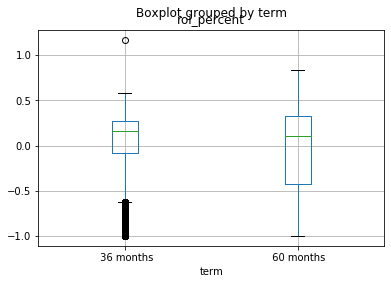

In [27]:
# roi percent by term length
# look at an early year to see if this is the same
subprime[['term','roi_percent']].boxplot(by='term',column='roi_percent')

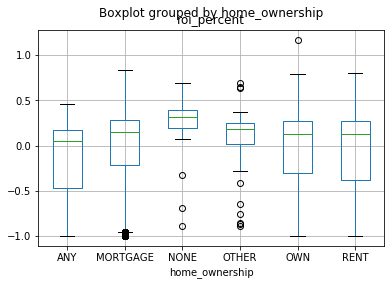

In [29]:
# roi percent with home ownership
subprime[['home_ownership','roi_percent']].boxplot(by='home_ownership',column='roi_percent')

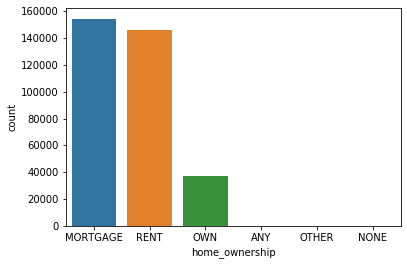

In [43]:
sns.countplot(x = 'home_ownership', data = subprime)

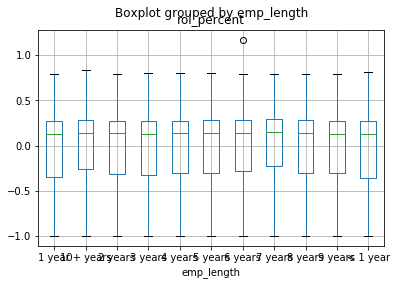

In [31]:
subprime[['emp_length','roi_percent']].boxplot(by='emp_length',column='roi_percent')

[Text(0, 0, '< 1 year'),
 Text(0, 0, '2 years'),
 Text(0, 0, '3 years'),
 Text(0, 0, '4 years'),
 Text(0, 0, '5 years'),
 Text(0, 0, '6 years'),
 Text(0, 0, '7 years'),
 Text(0, 0, '8 years'),
 Text(0, 0, '9 years'),
 Text(0, 0, '10+ years')]

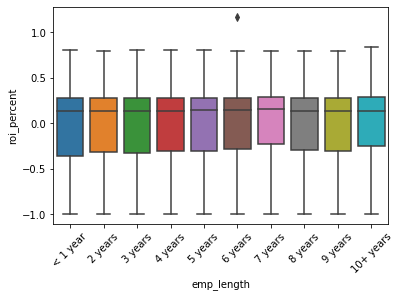

In [46]:
order = ['< 1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
emp = sns.boxplot(x = 'emp_length', y = 'roi_percent', data = subprime[['emp_length','roi_percent']], order = order)
emp.set_xticklabels(emp.get_xticklabels(),rotation=45)

In [42]:
subprime[['dti']]

,dti
4,25.37
13,9.39
19,25.49
27,23.35
31,20.84
40,22.21
41,35.70
46,17.35
49,17.60
56,31.88


In [ ]:
emp = sns.boxplot(x = 'emp_length', y = 'roi_percent', data = subprime[['emp_length','roi_percent']])

In [49]:
debt = pd.read_csv('debt.csv')

In [50]:
debt

,DATE,GFDEGDQ188S
0,1/1/66,40.33999
1,4/1/66,39.26763
2,7/1/66,39.62091
3,10/1/66,39.51977
4,1/1/67,39.20383
5,4/1/67,38.03292
6,7/1/67,38.82145
7,10/1/67,39.10231
8,1/1/68,38.42951
9,4/1/68,36.96379


In [57]:
subprime.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,roi_dollar,roi_percent,date,unemployment_rate,Year,unemployment_rate_start
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.50,11740.50,10400.00,1340.50,0.0,0.0,0.000,Jul-2016,10128.96,NaN,Mar-2018,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,...,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1340.50,0.128894,2015-12-01,5.0,2015,5.0
13,66624733,NaN,18000.0,18000.0,18000.0,60 months,19.48,471.70,E,E2,Software Manager,7 years,RENT,150000.0,Not Verified,2015-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,916xx,CA,9.39,0.0,Jun-2005,665.0,669.0,1.0,NaN,75.0,18.0,1.0,14052.0,40.7,27.0,w,0.0,0.0,9452.74,9452.74,3481.86,4351.98,0.0,1618.9,291.402,May-2017,471.70,NaN,Nov-2017,584.0,580.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,60.0,36247.0,2.0,2.0,1.0,3.0,2.0,22195.0,71.0,2.0,4.0,1271.0,55.0,34500.0,...,0.0,0.0,115.0,112.0,1.0,1.0,2.0,9.0,NaN,2.0,NaN,0.0,6.0,13.0,7.0,8.0,6.0,16.0,19.0,13.0,18.0,0.0,0.0,0.0,3.0,100.0,14.3,1.0,0.0,65819.0,36247.0,10300.0,31319.0,NaN,NaN,NaN,

In [ ]:
# correlations
# loan purpose and loan status/roi
# revolving utilization and roi/status/grade
# unemployment
# credit history
# bankrupcies 
# percent_bc_gt_75
# prt_tl_nvr_dlq

[Text(0, 0, 'major_purchase'),
 Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'house'),
 Text(0, 0, 'credit_card'),
 Text(0, 0, 'other'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'car'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'vacation'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'moving'),
 Text(0, 0, 'renewable_energy'),
 Text(0, 0, 'wedding'),
 Text(0, 0, 'educational')]

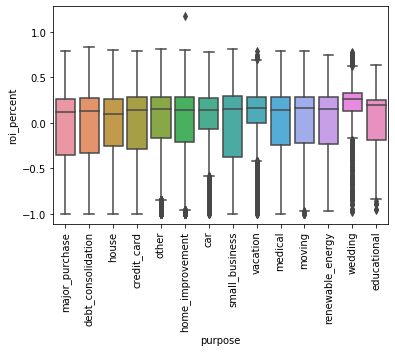

In [69]:
# purpose subprime boxplot
purp = sns.boxplot(x = 'purpose', y = 'roi_percent', data =subprime)
purp.set_xticklabels(purp.get_xticklabels(), rotation=90)


[Text(0, 0, 'major_purchase'),
 Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'house'),
 Text(0, 0, 'credit_card'),
 Text(0, 0, 'other'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'car'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'vacation'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'moving'),
 Text(0, 0, 'renewable_energy'),
 Text(0, 0, 'wedding'),
 Text(0, 0, 'educational')]

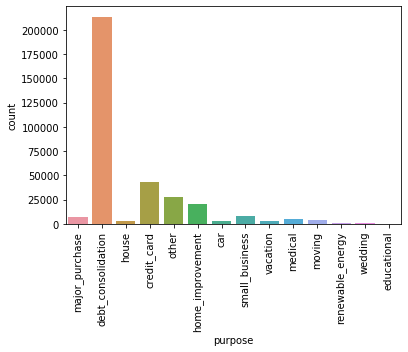

In [71]:
# purpose by 
purp = sns.countplot(x = 'purpose', data = subprime)
purp.set_xticklabels(purp.get_xticklabels(), rotation=90)

[Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'major_purchase'),
 Text(0, 0, 'credit_card'),
 Text(0, 0, 'other'),
 Text(0, 0, 'house'),
 Text(0, 0, 'vacation'),
 Text(0, 0, 'car'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'moving'),
 Text(0, 0, 'renewable_energy'),
 Text(0, 0, 'wedding'),
 Text(0, 0, 'educational')]

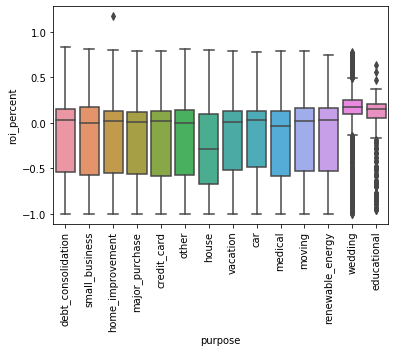

In [72]:
purp = sns.boxplot(x = 'purpose', y = 'roi_percent', data = data)
purp.set_xticklabels(purp.get_xticklabels(), rotation=90)

[Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'major_purchase'),
 Text(0, 0, 'credit_card'),
 Text(0, 0, 'other'),
 Text(0, 0, 'house'),
 Text(0, 0, 'vacation'),
 Text(0, 0, 'car'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'moving'),
 Text(0, 0, 'renewable_energy'),
 Text(0, 0, 'wedding'),
 Text(0, 0, 'educational')]

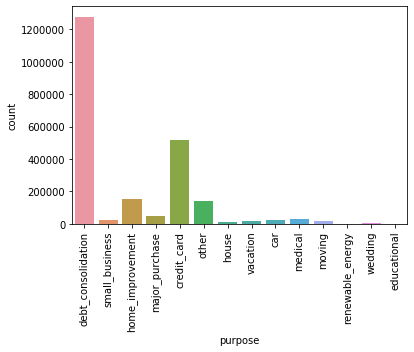

In [75]:
# purpose by 
purp = sns.countplot(x = 'purpose', data = data)
purp.set_xticklabels(purp.get_xticklabels(), rotation=90)

In [74]:
# revolving utilization and roi/status/grade

subprime.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,roi_dollar,roi_percent,date,unemployment_rate,Year,unemployment_rate_start
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.50,11740.50,10400.00,1340.50,0.0,0.0,0.000,Jul-2016,10128.96,NaN,Mar-2018,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,...,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1340.50,0.128894,2015-12-01,5.0,2015,5.0
13,66624733,NaN,18000.0,18000.0,18000.0,60 months,19.48,471.70,E,E2,Software Manager,7 years,RENT,150000.0,Not Verified,2015-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,916xx,CA,9.39,0.0,Jun-2005,665.0,669.0,1.0,NaN,75.0,18.0,1.0,14052.0,40.7,27.0,w,0.0,0.0,9452.74,9452.74,3481.86,4351.98,0.0,1618.9,291.402,May-2017,471.70,NaN,Nov-2017,584.0,580.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,60.0,36247.0,2.0,2.0,1.0,3.0,2.0,22195.0,71.0,2.0,4.0,1271.0,55.0,34500.0,...,0.0,0.0,115.0,112.0,1.0,1.0,2.0,9.0,NaN,2.0,NaN,0.0,6.0,13.0,7.0,8.0,6.0,16.0,19.0,13.0,18.0,0.0,0.0,0.0,3.0,100.0,14.3,1.0,0.0,65819.0,36247.0,10300.0,31319.0,NaN,NaN,NaN,

[Text(0, 0, 'A'),
 Text(0, 0, 'B'),
 Text(0, 0, 'C'),
 Text(0, 0, 'D'),
 Text(0, 0, 'E'),
 Text(0, 0, 'F'),
 Text(0, 0, 'G')]

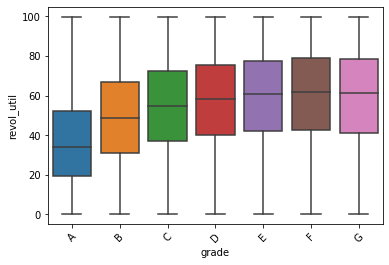

In [82]:
# revolving utility by grade
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] 
util = sns.boxplot(x = 'grade', y = 'revol_util', data = data.loc[data['revol_util']<100,:], order = order)
util.set_xticklabels(util.get_xticklabels(),rotation=45)

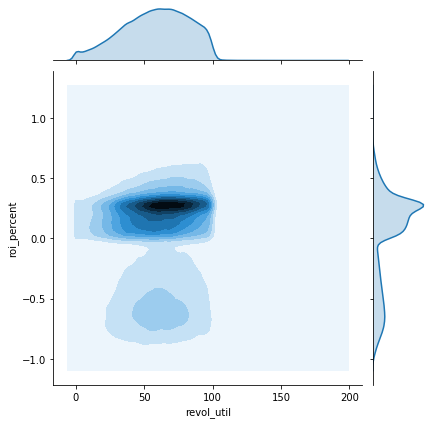

In [94]:
sns.jointplot(x = 'revol_util', y = 'roi_percent', data = subprime, kind = 'kde')

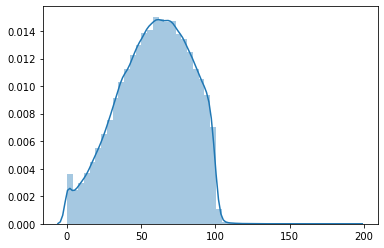

In [111]:
sns.distplot(subprime[['revol_util']])

[Text(0, 0, 'Fully Paid'),
 Text(0, 0, 'Charged Off'),
 Text(0, 0, 'Default'),
 Text(0, 0, 'Does not meet the credit policy. Status:Fully Paid'),
 Text(0, 0, 'Does not meet the credit policy. Status:Charged Off')]

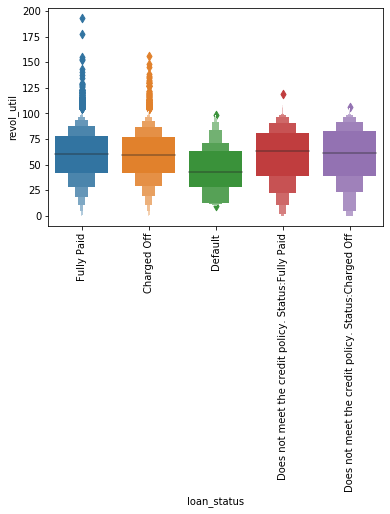

In [134]:
# revolving utility and loan result
util = sns.boxenplot(x = 'loan_status', y = 'revol_util', data = subprime)
util.set_xticklabels(util.get_xticklabels(),rotation=90)

[Text(0, 0, 'Fully Paid'),
 Text(0, 0, 'Charged Off'),
 Text(0, 0, 'Default'),
 Text(0, 0, 'Does not meet the credit policy. Status:Fully Paid'),
 Text(0, 0, 'Does not meet the credit policy. Status:Charged Off')]

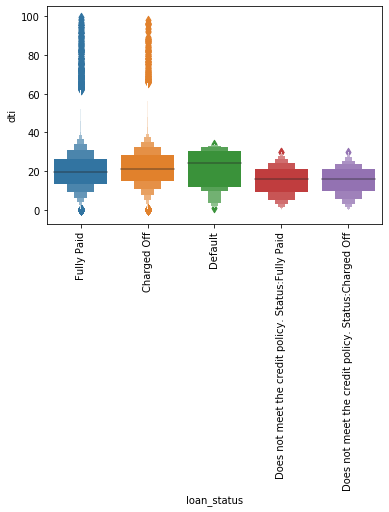

In [98]:
# loan status and dti
util = sns.boxenplot(x = 'loan_status', y = 'dti', data = subprime.loc[data['dti']<100,:])
util.set_xticklabels(util.get_xticklabels(),rotation=90)

[Text(0, 0, 'Fully Paid'),
 Text(0, 0, 'Charged Off'),
 Text(0, 0, 'Default'),
 Text(0, 0, 'Does not meet the credit policy. Status:Fully Paid'),
 Text(0, 0, 'Does not meet the credit policy. Status:Charged Off')]

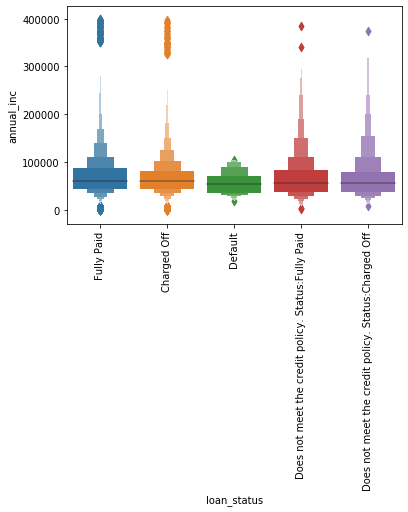

In [109]:
util = sns.boxenplot(x = 'loan_status', y = 'annual_inc', data = subprime.loc[subprime['annual_inc']<400000,:])
util.set_xticklabels(util.get_xticklabels(),rotation=90)

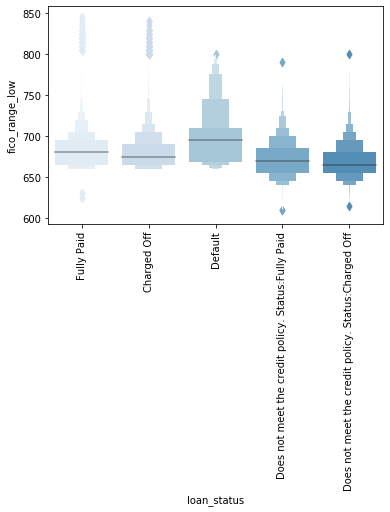

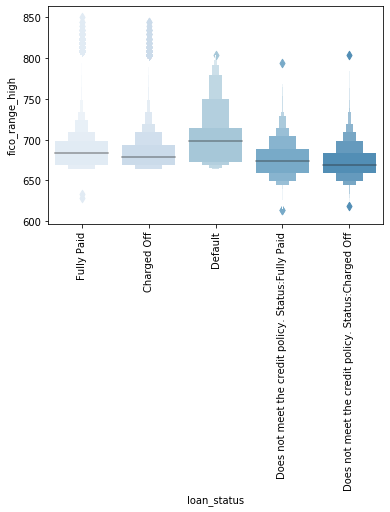

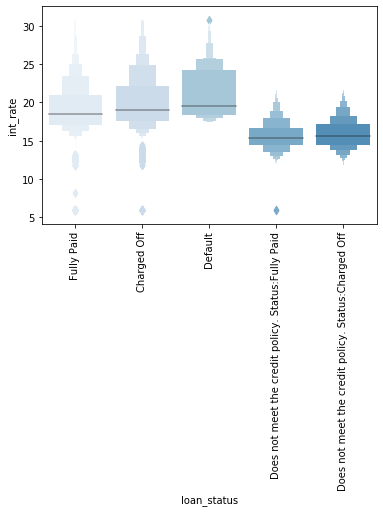

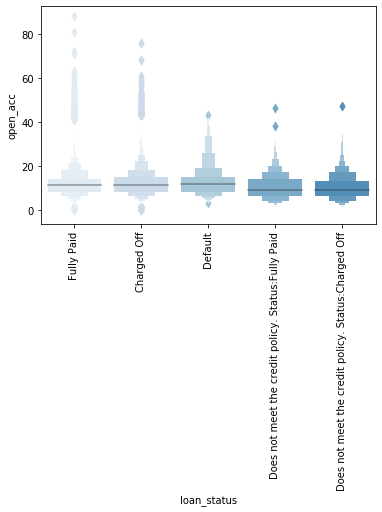

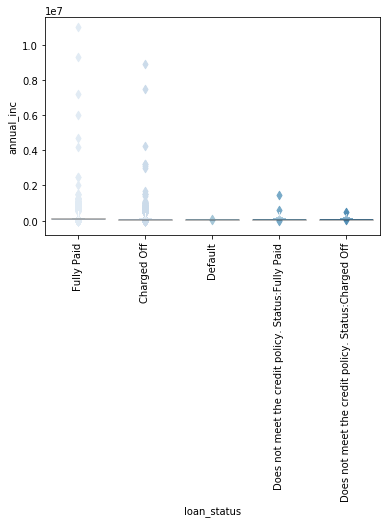

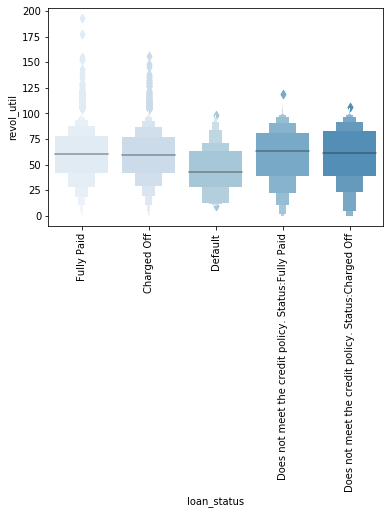

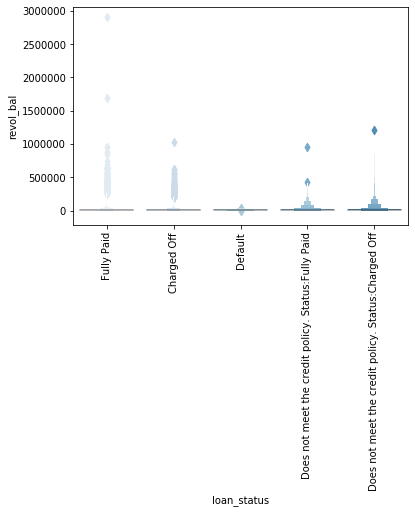

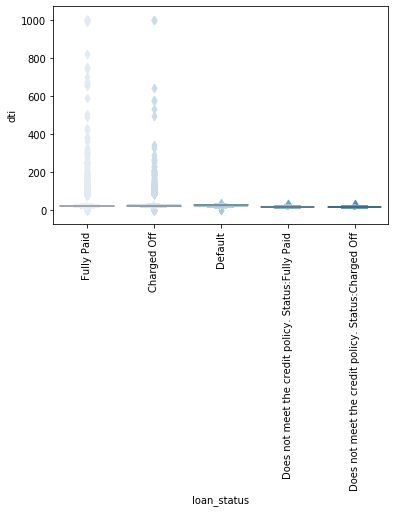

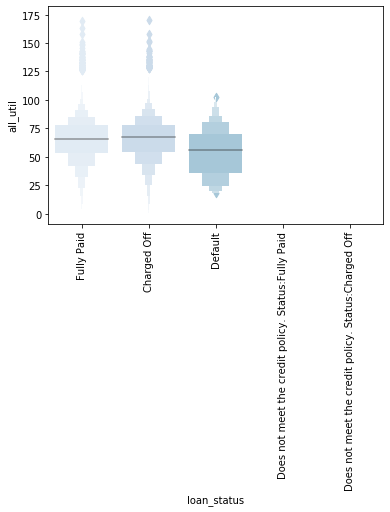

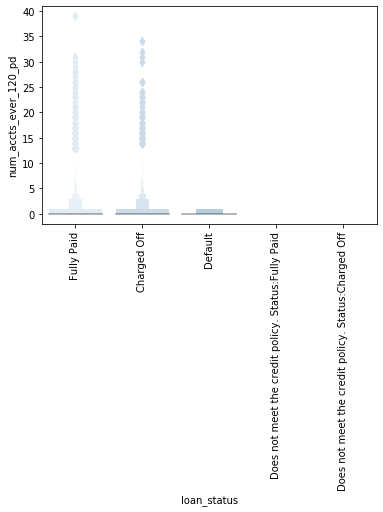

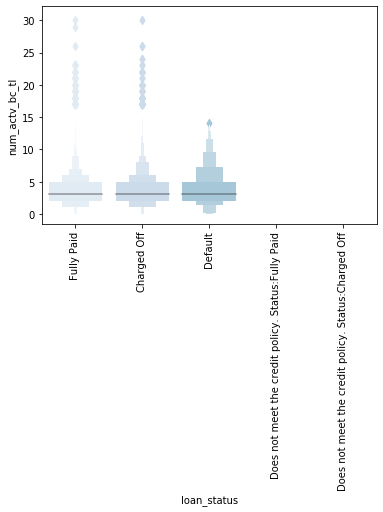

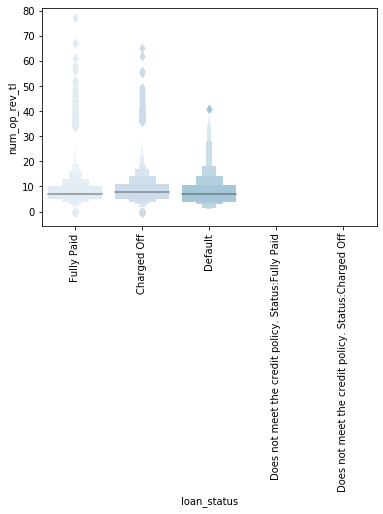

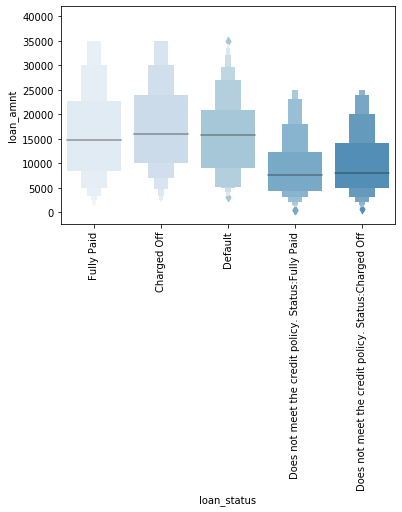

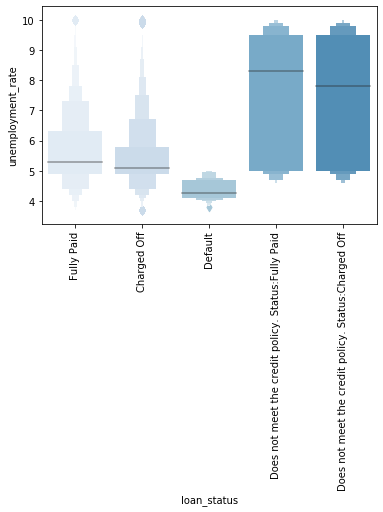

In [132]:
box_features = ['fico_range_low', 'fico_range_high', 'int_rate', 'open_acc', 'annual_inc', 'revol_util', 'revol_bal', 'dti','all_util', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_op_rev_tl', 'loan_amnt','unemployment_rate']


for feature in box_features:
    plt.figure()
    y = sns.boxenplot(x='loan_status', y=feature , data=subprime, palette = sns.color_palette("Blues", n_colors=7))
    y.set_xticklabels(y.get_xticklabels(),rotation=90)
    


In [131]:
subprime[['roi_percent','fico_range_low', 'fico_range_high', 'int_rate', 'open_acc', 'annual_inc', 'revol_util', 'revol_bal', 'dti','all_util', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_op_rev_tl', 'loan_amnt','total_acc','tot_cur_bal']].corr(method = 'pearson')

,roi_percent,fico_range_low,fico_range_high,int_rate,open_acc,annual_inc,revol_util,revol_bal,dti,all_util,num_accts_ever_120_pd,num_actv_bc_tl,num_op_rev_tl,loan_amnt,total_acc,tot_cur_bal
roi_percent,1.000000,-0.009707,-0.009707,-0.107326,-0.031865,0.024667,0.074120,0.025001,-0.054706,0.007775,0.001126,-0.012236,-0.026373,-0.037077,0.001721,0.050533
fico_range_low,-0.009707,1.000000,1.000000,-0.024997,-0.014558,0.036740,-0.298785,0.047686,0.019356,-0.266678,-0.155641,-0.111875,-0.032067,0.159112,-0.028308,0.077776
fico_range_high,-0.009707,1.000000,1.000000,-0.024997,-0.014558,0.036740,-0.298785,0.047685,0.019356,-0.266678,-0.155641,-0.111875,-0.032067,0.159112,-0.028308,0.077776
int_rate,-0.107326,-0.024997,-0.024997,1.000000,0.034702,0.025946,-0.012146,0.012115,0.046716,0.035697,0.000976,0.010959,0.015437,0.150860,0.009551,0.017882
open_acc,-0.031865,-0.014558,-0.014558,0.034702,1.000000,0.145119,-0.117723,0.242874,0.211184,-0.004114,0.039140,0.558722,0.831867,0.207331,0.696510,0.262781
annual_inc,0.024667,0.036740,0.036740,0.025946,0.145119,1.000000,0.053660,0.278829,-0.139289,0.025707,0.035111,0.117775,0.090040,0.343466,0.191749,0.379105
revol_util,0.074120,-0.298785,-0.298785,-0.012146,-0.117723,0.053660,1.000000,0.258356,0.101458,0.595014,-0.090796,0.131403,-0.163953,0.093117,-0.068220,0.125893
revol_bal,0.025001,0.047686,0.047685,0.012115,0.242874,0.278829,0.258356,1.000000,0.112762,0.114654,-0.085794,0.313845,0.263269,0.311683,0.211025,0.436262
dti,-0.054706,0.019356,0.019356,0.046716,0.211184,-0.139289,0.101458,0.112762,1.000000,0.098221,-0.045047,0.117737,0.139812,0.013960,0.169412,0.020293
all_util,0.007775,-0.266678,-0.266678,0.035697,-0.004114,0.025707,0.595014,0.114654,0.098221,1.000000,0.047701,-0.047854,-0.237410,-0.016577,0.031629,0.147315


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,roi_dollar,roi_percent,date,unemployment_rate,Year,unemployment_rate_start
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.50,11740.50,10400.00,1340.50,0.0,0.0,0.000,Jul-2016,10128.96,NaN,Mar-2018,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,...,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1340.50,0.128894,2015-12-01,5.0,2015,5.0
13,66624733,NaN,18000.0,18000.0,18000.0,60 months,19.48,471.70,E,E2,Software Manager,7 years,RENT,150000.0,Not Verified,2015-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,916xx,CA,9.39,0.0,Jun-2005,665.0,669.0,1.0,NaN,75.0,18.0,1.0,14052.0,40.7,27.0,w,0.0,0.0,9452.74,9452.74,3481.86,4351.98,0.0,1618.9,291.402,May-2017,471.70,NaN,Nov-2017,584.0,580.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,60.0,36247.0,2.0,2.0,1.0,3.0,2.0,22195.0,71.0,2.0,4.0,1271.0,55.0,34500.0,...,0.0,0.0,115.0,112.0,1.0,1.0,2.0,9.0,NaN,2.0,NaN,0.0,6.0,13.0,7.0,8.0,6.0,16.0,19.0,13.0,18.0,0.0,0.0,0.0,3.0,100.0,14.3,1.0,0.0,65819.0,36247.0,10300.0,31319.0,NaN,NaN,NaN,

In [135]:
subprime[['rev_utility']]

KeyError: "None of [Index(['rev_utility'], dtype='object')] are in the [columns]"